# Homework 4

## References

+ Lectures 11-12 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

**Note**: Please match all the pages corresponding to each of the questions when you submit on gradescope. 

## Student details

+ **First Name:** Alex
+ **Last Name:** Shank
+ **Email:** shank14@purdue.edu

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
import numpy as np

## Problem 1

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may be unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of orange and red colors in each decade). We have done this for you.

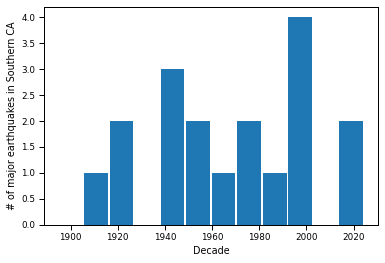

In [2]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019 
])
fig, ax = plt.subplots()
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA');

A. The right way to model the number of earthquakes $X_n$ in a decade $n$ is using a Poisson distribution with unknown rate parameter $\lambda$, i.e.,
$$
X_n | \lambda \sim \operatorname{Poisson}(\lambda).
$$
Here we have $N = 12$ observations, say $x_{1:N} = (x_1,\dots,x_N)$ (stored in ``eq_data`` above).
Find the *joint probability* (otherwise known as the likelihood) $P(x_{1:N}|\lambda)$ of these random variables.<br>
**Answer:**
<br><br>
$$
P(x_{j}|\lambda) = \frac{\lambda^{x_{j}}e^{-\lambda}}{x_{j}!}
$$
<br>
$$
P(x_{1:N}|\theta) = \prod_{j=1}^NP(x_j|\lambda)
$$
<br>
$$
P(x_{1:N}|\lambda) = \prod_{j=1}^N\frac{\lambda^{x_{j}}e^{-\lambda}}{x_{j}!}
$$
<br>
$$
P(x_{1:N}|\lambda) = \frac{\lambda^{\sum_{j=1}^Nx_{j}}e^{-N\lambda}}{\prod_{j=1}^N(x_{j}!)}
$$
<br><br>

B. The rate parameter $\lambda$ (number of major earthquakes per ten years) is positive. What prior distribution should we assign to it if we expect it to be around 2?
A convenient choice here is to pick a [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution), see also [the scipy.stats page for the Gamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html) because it results in an analytical posterior.
We write:
$$
\lambda \sim \operatorname{Gamma}(\alpha, \beta),
$$
where $\alpha$ and $\beta$ are positive *hyper-parameters* that we have to set to represent our prior state of knowledge.
The PDF is:
$$
P(\lambda) = \frac{\beta^\alpha \lambda^{\alpha-1}e^{-\beta \lambda}}{\Gamma(\alpha)},
$$
where we are not conditioning on $\alpha$ and $\beta$ because they should be fixed numbers.
Use the code below to pick some some reasonable values for $\alpha$ and $\beta$.
Hint: Notice that the maximum entropy distribution for a positive parameter with known expectation is the [Exponential](https://en.wikipedia.org/wiki/Exponential_distribution), e.g., see the Table in [this wiki page](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution). Then notice that the Exponential is a special case of the Gamma (set $\alpha=1$).

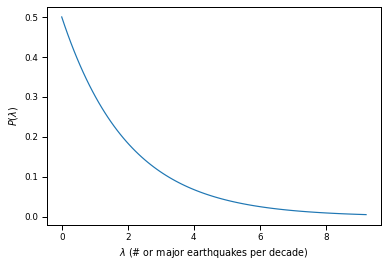

In [3]:
import scipy.stats as st
alpha = 1.0
beta = 1.0 / 2    # we expect 2 eq per year, and rate parameter is 1 / expected
lambda_prior = st.gamma(alpha, scale=1.0 / beta) # Make sure you understand why scale = 1 / beta
lambdas_prior_xs = np.linspace(0, lambda_prior.ppf(0.99), 100)
fig, ax = plt.subplots()
ax.plot(lambdas_prior_xs, lambda_prior.pdf(lambdas_prior_xs))
ax.set_xlabel('$\lambda$ (# or major earthquakes per decade)')
ax.set_ylabel('$P(\lambda)$');

C. Show that the posterior of $\lambda$ conditioned on $x_{1:N}$ is also a Gamma, but with updated hyperparameters.
<br>
Hint: When you write down the posterior of $\lambda$ you can drop any multiplicative term that does not depend on it as it will be absorbed in the normalization constant. This will simplify the notation a little bit.
<br>
**Answer:**
<br><br>
<br>
$$
P(\lambda|x_{1:N}) = P(x_{1:N}|\lambda) \cdot P(\lambda)
$$
<br>
$$
P(\lambda|x_{1:N}) = \frac{\lambda^{\sum_{j=1}^Nx_{j}}e^{-N\lambda}}{\prod_{j=1}^N(x_{j}!)} \cdot \frac{\beta^\alpha \lambda^{\alpha-1}e^{-\beta \lambda}}{\Gamma(\alpha)}
$$
<br>
By pulling out all terms that are not dependent on $\lambda$ into a constant $K$, we get to...
<br>
<br>
$$
P(\lambda|x_{1:N}) = K(\lambda^{\sum_{j=1}^Nx_{j}+\alpha-1}e^{-\lambda(\beta+N)})
$$
<br>
Comparing this to the Gamma distribution's pdf, we can see that our hyperparameters are now...
<br>
$$
\alpha \rightarrow \alpha + \sum_{j=1}^Nx_{j}
$$
<br>
$$
\beta \rightarrow \beta + N
$$
<br>

D. Prior-likelihood pairs that result in a posterior with the same form as the prior as known as conjugate distributions. Conjugate distributions are your only hope for analytical Bayesian inference.
As a sanity check, look at the wikipedia page for [conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior), locate the Poisson-Gamma pair and verify your answer above.

![Conjugate Table](conjugate_table.png)
**Yes, I have verified it. See the screenshot above that matchest our derived results.**
<br><br>
**Note - If screenshot doesn't appear, it was simply a screenshot of the specific part of the wikipedia page that tells us our derived alpha and better are as expected.**

E. Plot the prior and the posterior of $\lambda$ on the same plot.

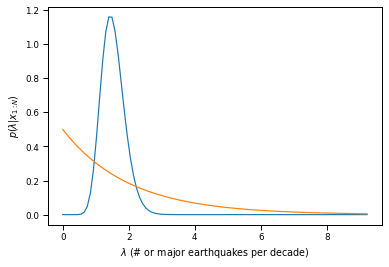

In [6]:
alpha_post = alpha + np.sum(eq_data)
beta_post = beta + eq_data.shape[0]

lambda_post = st.gamma(alpha_post, scale=1.0 / beta_post)
fig, ax = plt.subplots()
ax.plot(lambdas_prior_xs, lambda_post.pdf(lambdas_prior_xs))
ax.plot(lambdas_prior_xs, lambda_prior.pdf(lambdas_prior_xs))
ax.set_xlabel('$\lambda$ (# or major earthquakes per decade)')
ax.set_ylabel('$p(\lambda|x_{1:N})$');

F. Let's work out the predictive distribution for the number of major earthquakes during the next decade.
This is something that we did not do in class, but it will appear again and again in future lectures.
Let $X$ be the random variable corresponding to the number of major eathquakes during the next decade.
We need to calculate:
$$
P(x|x_{1:N}) = \text{our state of knowledge about $X$ after seeing the data}.
$$
How do we do this?
We just use the sum rule:
$$
P(x|x_{1:N}) = \int_{0}^\infty P(x|\lambda, x_{1:N}) P(\lambda|x_{1:N})d\lambda = \int_{0}^\infty P(x|\lambda) P(\lambda|x_{1:N})d\lambda,
$$
where going from the middle step to the rightmost one we used the assumption that the number of earthquakes occuring in each decade is independent.
Carry out this integral and show that it will give you the [negative Binomial](https://en.wikipedia.org/wiki/Negative_binomial_distribution) distribution $\operatorname{NB}(r,p)$, see also the [scipy.stats papge](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html) with parameters
$$
r = \alpha + \sum_{n=1}^N x_n,
$$
and
$$
p = \frac{1}{\beta + N + 1}.
$$
The probability density of the negative Binomial is (using the notation of wikipedia):
$$
\operatorname{NB}(k|r,p) = {k + r - 1\choose k}(1-p)^rp^k.
$$
You may also use the fact that:
$$
\begin{split}
\int_0^\infty y^{\alpha-1}e^{-y\beta}dy &=
\text{inverse normalization constant of }\operatorname{Gamma}(\alpha,\beta)\\
&= \frac{\Gamma(\alpha)}{\beta^\alpha},
\end{split}
$$
and that $\Gamma(n+1) = n!$.

**Answer:**
<br><br>
$$
P(x|x_{1:N}) = \int_{0}^\infty P(x|\lambda) P(\lambda|x_{1:N})d\lambda,
$$
<br>
$$
P(x|x_{1:N}) = \frac{ \lambda^x e^{-\lambda} }{ x! }
\frac{\lambda^{\alpha-1}\beta^\alpha e^{-\beta \lambda}}{\Gamma(\alpha)}
$$
<br>
$$
P(x|x_{1:N}) = \frac{\beta^\alpha}{x!\cdot \Gamma(\alpha)}
\int_0^\infty \lambda^{(x+\alpha)-1}e^{-\lambda(\beta+1)}dy
$$
<br>
$$
P(x|x_{1:N}) = \frac{\beta^\alpha}{x! \cdot \Gamma(\alpha)} \cdot
\frac{\Gamma(\alpha+x)}{(\beta+1)^{\alpha+x}}
$$
<br>
$$
P(x|x_{1:N}) = \frac{\beta^\alpha}{x! \cdot (a-1)!} \cdot
\frac{(x+a-1)!}{(\beta+1)^{\alpha+x}}
$$
<br>
$$
P(x|x_{1:N}) = {x + a - 1\choose x}\frac{\beta^\alpha}{(\beta+1)^{\alpha+x}}
$$
<br>
$$
P(x|x_{1:N}) = {x + a - 1\choose x}({\frac{\beta}{\beta+1}})^a {(\beta+1)}^x
$$
<br>
We can substitute our updated $\alpha$ and $\beta$ values into this equation, and then our given $r$ and $p$ values. Simplifying and rearranging will then produce our expected result.
<br><br>
$$
P(x|x_{1:N}) = {x + r - 1\choose x}(1-p)^r {p}^x
$$
<br><br>

G. Plot the predictive distribution $P(x|x_{1:N})$.

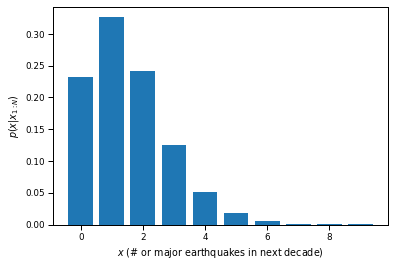

In [11]:
r = alpha_post
p = 1.0 / (beta_post + 1)
X = st.nbinom(r, 1.0 - p) # Please pay attention to the wiki and scipy.stats differences

xs2 = np.linspace(0, 9, 10)
fig2, ax2 = plt.subplots()
ax2.bar(xs2, X.pmf(xs2))
ax2.set_xlabel('$x$ (# or major earthquakes in next decade)')
ax2.set_ylabel('$p(x|x_{1:N})$');

H. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**
<br><br>
$$
P(X \geq 1) = 1 - P(X < 1) = 1 - P(X = 0)
$$
So...
<br><br>

In [12]:
print('Probability that at least one major earthquake will occur during the next decade: ')
print(1 - X.pmf(0))

Probability that at least one major earthquake will occur during the next decade: 
0.7682879360036188


I. What is the probability that at least one major earthquake will occur during the next two decades?<br>
**Answer:**
<br><br>
The probability of at least one major earthquake happening in the next two decades is related to the probability of no earthquakes happening in the next two decades. Since each decade can be considered independent, we can use the product rule.
<br><br>
Let's call the event corresponding to at least one major earthquake in the next two decades $Z$.
<br><br>
$$
P(Z) = 1 - {P(X=0)}^2
$$
<br><br>
So...
<br>

In [13]:
print('Probability that at least one major earthquake will occur during the next two decades: ')
print(1 - X.pmf(0)**2)

Probability that at least one major earthquake will occur during the next two decades: 
0.9463095193985369


J. Find a 95\% credible interval for $\lambda$.

In [14]:
# Write your code here and print() your answer
lambda_low = lambda_post.ppf(0.025)
lambda_up = lambda_post.ppf(0.975)
print('Lambda is in [{0:1.2f}, {1:1.2f}] with 95% probability'.format(lambda_low, lambda_up))

Lambda is in [0.92, 2.28] with 95% probability


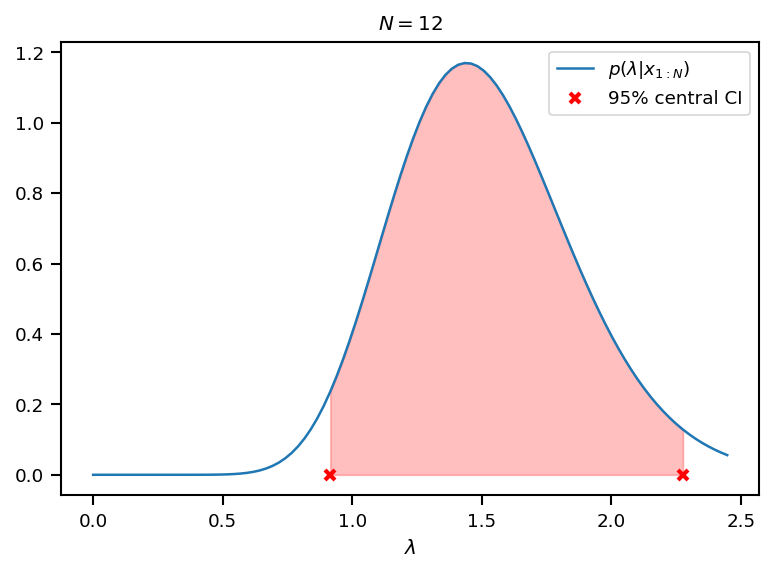

In [15]:
fig3, ax3 = plt.subplots(dpi=150)
ax3.plot(lambdas, lambda_post.pdf(lambdas), label='$p(\lambda|x_{1:N})$')
lambda_int = np.linspace(lambda_low, lambda_up, 100)
ax3.fill_between(lambda_int, np.zeros(lambda_int.shape), lambda_post.pdf(lambda_int), color='red', alpha=0.25)
ax3.plot([lambda_low, lambda_up], np.zeros((2,)), 'x', color='red', markeredgewidth=2, label='95% central CI')
ax3.set_xlabel('$\lambda$')
ax3.set_title('$N={0:d}$'.format(eq_data.shape[0]))
plt.legend(loc='best')

K. Find the $\lambda$ that minimizes the absolute loss (see lecture), call it $\lambda^*_N$.
Then, plot the fully Bayesian predictive $P(x|x_{1:N})$ in the same figure as $P(x|\lambda^*_N)$.
<br><br>
The $\lambda^*_N$ that minimizes the absolute loss of $P(x|\lambda)$ is given by $P(\lambda \le \lambda^*_N | x_{1:N}) = 0.5$, which is...

In [16]:
print(lambda_star := lambda_post.median())

1.493418109165735


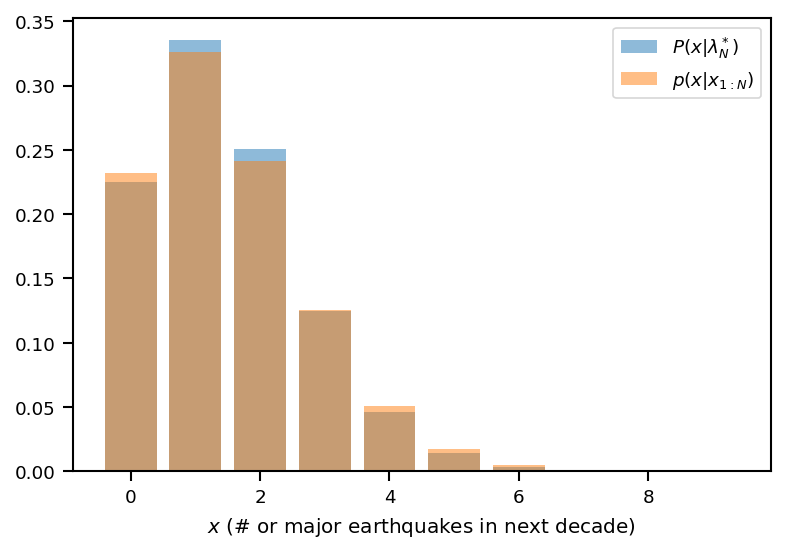

In [17]:
fig4, ax4 = plt.subplots(dpi=150)
X_min_loss = st.poisson(lambda_star)
ax4.bar(xs2, X_min_loss.pmf(xs2), alpha=0.5, label='$P(x|\lambda^*_N)$')
ax4.bar(xs2, X.pmf(xs2), alpha=0.5, label='$p(x|x_{1:N})$')
ax4.set_xlabel('$x$ (# or major earthquakes in next decade)')
plt.legend(loc='best')

L. Draw replicated data from the model and compare them to the observed data. Hint: Complete the missing code at the places indicated below.

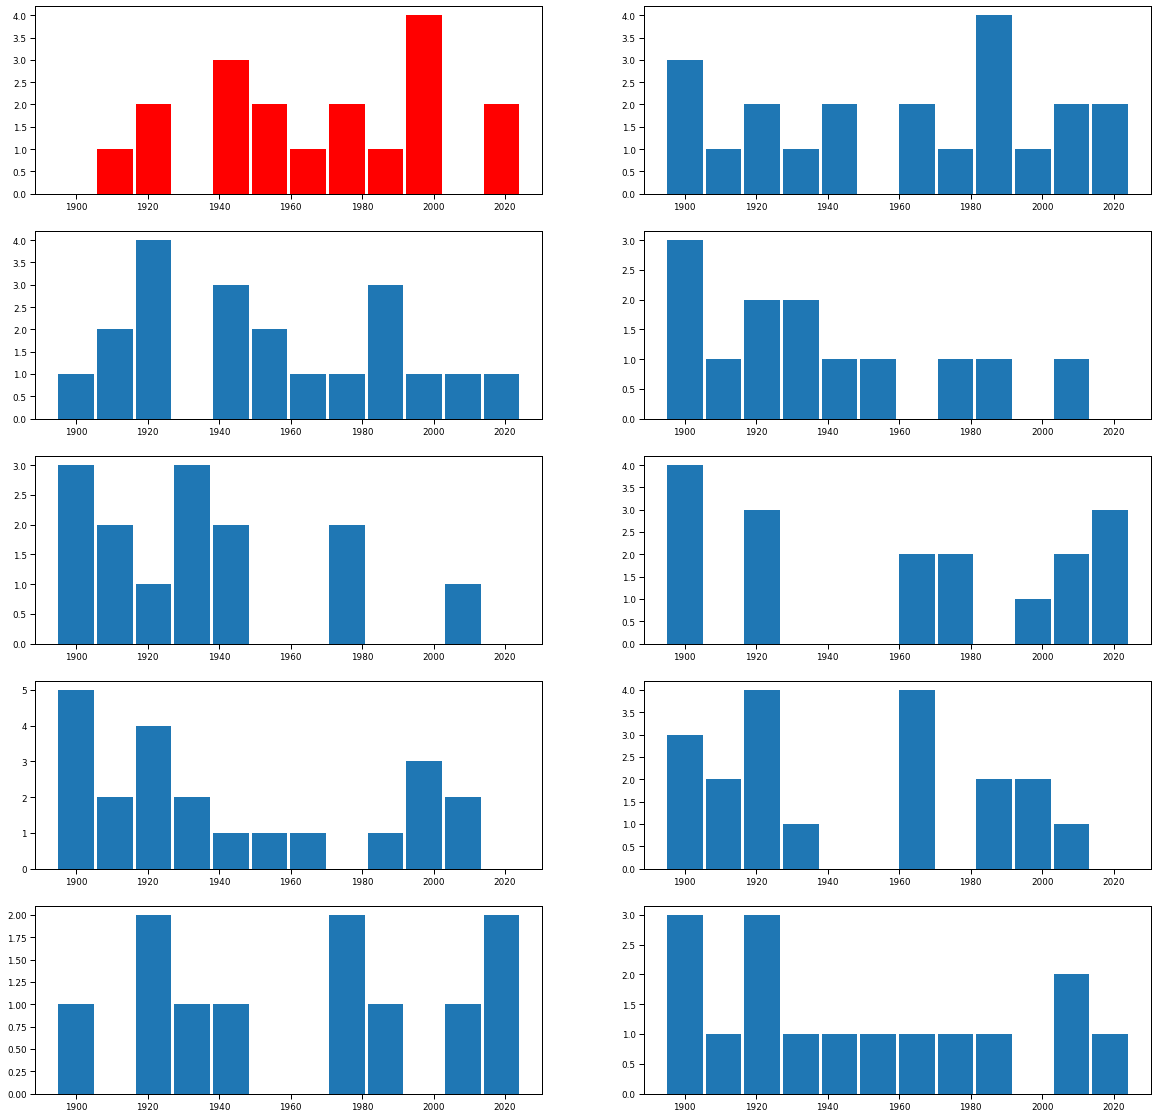

In [18]:
n_rep = 9
x_rep = np.ndarray((n_rep, eq_data.shape[0]))
for i in range(n_rep):
    lambda_post_sample = lambda_post.rvs(eq_data.shape[0])
    x_rep[i, :] = st.poisson(lambda_post_sample).rvs(size=eq_data.shape[0])
fig4, ax4 = plt.subplots(5, 2, figsize=(20, 20))
ax4[0, 0].bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10, color='red')
for i in range(1, n_rep + 1):
    ax4[int(i / 2), i % 2].bar(np.linspace(1900, 2019, eq_data.shape[0]), x_rep[i-1], width=10)

**The generated samples seem to align with the original data, for the most part. However, we will need to use some test quantities to check if we are generating our date in a grossly wrong way.**

M. Plot the histograms and calculate the Bayesian p-values of the following test-quantities:

+ Maximum number of consecutive decades with no earthquakes.
+ Maximum number of consecutive decades with earthquakes.


The observed test quantity is 1
The Bayesian p_value is 0.4136


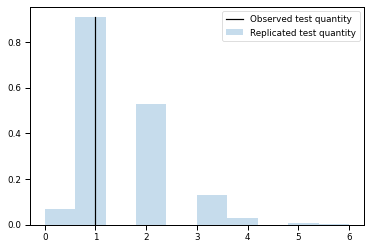

In [19]:
# Define the test quantity as a function of the data:
def max_consecutive_no_earthquakes(x):
    """
    Return the maximum number of consecutive decades with no earthquakes.
    """
    count = 0
    result = 0
    for i in range(x.shape[0]):
        if x[i] != 0:
            count = 0
        else:
            count += 1
            result = max(result, count)
    return result
    
# The observed test quantity
max_consecutive_no_earthquakes_obs = max_consecutive_no_earthquakes(eq_data)
print('The observed test quantity is {0:d}'.format(max_consecutive_no_earthquakes_obs))
# Draw replicated data
n_rep = 5000
x_rep = np.ndarray((n_rep, eq_data.shape[0]))
for i in range(n_rep):
    # Student code 1: Take a sample of lambda from its posterior:
    lambda_post_sample = lambda_post.rvs(eq_data.shape[0])
    # Student code 2: Take a sample of size eq_data.shape[0] from the Poisson with parameter
    # lambda_post_sample (You can use st.poisson)
    x_rep[i, :] = st.poisson(lambda_post_sample).rvs(size=eq_data.shape[0])
# Evaluate the test quantity
max_consecutive_no_earthquakes_rep = np.ndarray(x_rep.shape[0])
for i in range(x_rep.shape[0]):
    max_consecutive_no_earthquakes_rep[i] = max_consecutive_no_earthquakes(x_rep[i, :])
# Estimate the Bayesian p-value
p_val = np.sum(np.ones((n_rep,))[max_consecutive_no_earthquakes_rep > max_consecutive_no_earthquakes_obs]) / n_rep
print('The Bayesian p_value is {0:1.4f}'.format(p_val))
# Do the plot
fig, ax = plt.subplots()
tmp = ax.hist(max_consecutive_no_earthquakes_rep, density=True, alpha=0.25, label='Replicated test quantity')[0]
ax.plot(max_consecutive_no_earthquakes_obs * np.ones((50,)), np.linspace(0, tmp.max(), 50), 'k', label='Observed test quantity')
plt.legend(loc='best');

The observed test quantity is 6
The Bayesian p_value is 0.3402


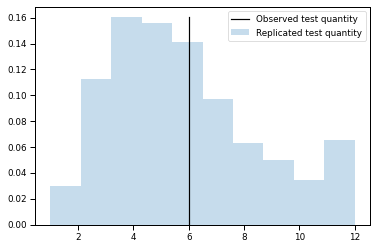

In [20]:
# Define the test quantity as a function of the data:
def max_consecutive_yes_earthquakes(x):
    """
    Return the maximum number of consecutive decades with at least one earthquake.
    """
    count = 0
    result = 0
    for i in range(x.shape[0]):
        if x[i] == 0:
            count = 0
        else:
            count += 1
            result = max(result, count)
    return result
    
# The observed test quantity
max_consecutive_yes_earthquakes_obs = max_consecutive_yes_earthquakes(eq_data)
print('The observed test quantity is {0:d}'.format(max_consecutive_yes_earthquakes_obs))
# Draw replicated data
n_rep = 5000
x_rep = np.ndarray((n_rep, eq_data.shape[0]))
for i in range(n_rep):
    # Student code 1: Take a sample of lambda from its posterior:
    lambda_post_sample = lambda_post.rvs(eq_data.shape[0])
    # Student code 2: Take a sample of size eq_data.shape[0] from the Poisson with parameter
    # lambda_post_sample (You can use st.poisson)
    x_rep[i, :] = st.poisson(lambda_post_sample).rvs(size=eq_data.shape[0])
# Evaluate the test quantity
max_consecutive_yes_earthquakes_rep = np.ndarray(x_rep.shape[0])
for i in range(x_rep.shape[0]):
    max_consecutive_yes_earthquakes_rep[i] = max_consecutive_yes_earthquakes(x_rep[i, :])
# Estimate the Bayesian p-value
p_val = np.sum(np.ones((n_rep,))[max_consecutive_yes_earthquakes_rep > max_consecutive_yes_earthquakes_obs]) / n_rep
print('The Bayesian p_value is {0:1.4f}'.format(p_val))
# Do the plot
fig, ax = plt.subplots()
tmp = ax.hist(max_consecutive_yes_earthquakes_rep, density=True, alpha=0.25, label='Replicated test quantity')[0]
ax.plot(max_consecutive_yes_earthquakes_obs * np.ones((50,)), np.linspace(0, tmp.max(), 50), 'k', label='Observed test quantity')
plt.legend(loc='best');

**These test values are close enough to 0.5 for us to accept them. This does not mean our model is correct, but it gives us some more confidence that it is not grossly incorrect.**